In [1]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from numpy import *
from scipy.integrate import odeint
%matplotlib inline

X = 0.550027083673
X = 0.745364056288


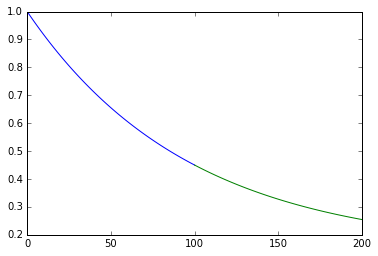

In [2]:
"""2 a)"""

k = 0.00883
Kc = 5.8
def PFR(C,t):
    Ca,Cb = C
    ra = -k*Ca + (k/Kc)*Cb
    rb = -ra

    return [ra,rb]
Wspan = linspace(0,100,50)
CAo = 1
Ci = odeint(PFR,[CAo,0],Wspan)
Ca = Ci[:,0]
Cb = Ci[:,1]
plt.plot(Wspan,Ca)
X = (CAo - Ca[-1])/CAo
print ('X = ' + str(X))
Wspan2 = linspace(100,200,50)
Ci2 = odeint(PFR,[Ca[-1],Cb[-1]],Wspan2)
Ca2 = Ci2[:,0]

plt.plot(Wspan2,Ca2)
X = (CAo - Ca2[-1])/CAo
print ('X = ' + str(X))


X = 0.550027066789
X = 0.895374081039


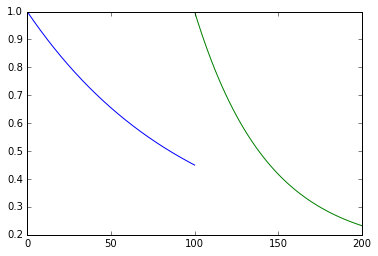

In [3]:
"""2 b)"""

k = 0.00883
Kc = 5.8
Q = 1
def PFR(C,t):
    Fa,Fb = C
    ra = -k*(Fa/Q) + (k/Kc)*(Fb/Q)
    rb = -ra
    return [ra,rb]

Wspan = linspace(0,100,500)
CAo = 1
Ci = odeint(PFR,[CAo,0],Wspan)
Ca = Ci[:,0]
Cb = Ci[:,1]
Qnew = Q*Ca[-1]
def PFR(C,t):
    Fa,Fb = C
    ra = -k*(Fa/Qnew) + (k/Kc)*(Fb/Qnew)
    rb = -ra
    return [ra,rb]
NAconverted = (CAo - Ca[-1])*Q

plt.plot(Wspan,Ca)
X = (CAo - Ca[-1])/CAo
print ('X = ' + str(X))
Wspan2 = linspace(100,200,50)
Ci2 = odeint(PFR,[CAo,0],Wspan2)
Ca2 = Ci2[:,0]

NAconverted2 = (CAo - Ca2[-1])*Qnew
NT = NAconverted + NAconverted2
plt.plot(Wspan2,Ca2)
X = (NT)/CAo
print ('X = ' + str(X))

W = 45.15059053390864


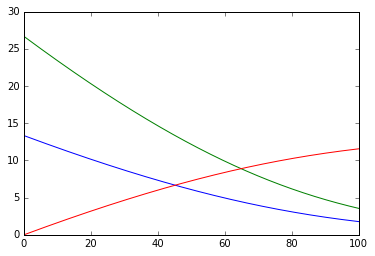

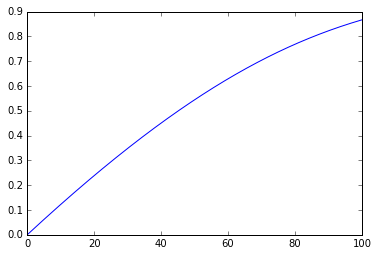

In [4]:
"""3 a)"""

FT = 40 #mol/min
FAo = FT/3
FBo = 2*FT/3
k = 0.05
P = 5

def PBR(F,t):
    FA, FB, FC = F
    Ftot = (FA + FB + FC)
    ra = -k*(FB/Ftot)*P
    rb = 2*ra
    rc = -ra
    return (ra,rb,rc)

wspan = linspace(0,100,1000)
F = odeint(PBR,[FAo,FBo,0],wspan)
Fa = F[:,0]
X = (FAo- Fa)/FAo
W = interp(0.5,X,wspan)
print ('W = ' +str(W))
plt.plot(wspan,F)
plt.show()
plt.plot(wspan,X)
plt.show()

W = 52.90487123542537
P = 3.3788557241957604


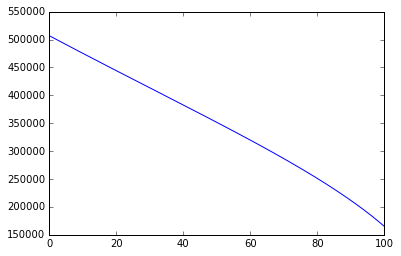

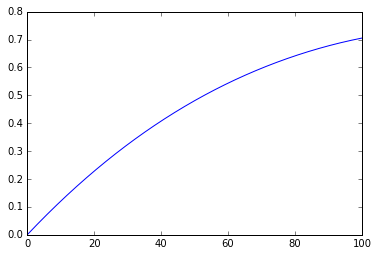

In [12]:
A = (pi/4)*0.085**2
G = (40/60)*30/1000/A
E = 0.4
Po = 5*101.325*1000
dp = 0.003
mu = 2e-5
FT = 40 #mol/mi
FAo = FT*0.33
FBo = 0.67*FT
k = 0.05
rhoA = (Po/1000)*30/(8.314*(273.15+170))
rhoB = 1000
K = (1/(rhoB*A))*(-G/(rhoA*dp))*((1-E)/(E**3))*(150*mu*(1-E)/dp + 1.75*G)

def PBR(F,t):
    FA, FB, FC, P = F
    Ftot = (FA + FB + FC)
    ra = -k*(FB/Ftot)*P/(101.325*1000)
    rb = 2*ra
    rc = -ra
    dpdw = K*(Po*Ftot)/(P*FT)
    return (ra,rb,rc,dpdw)

wspan = linspace(0,100,1000)
F = odeint(PBR,[FAo,FBo,0,Po],wspan)
Fa = F[:,0]
P = F[:,3]
X = (FAo- Fa)/FAo
W = interp(0.5,X,wspan)
Pf = interp(0.5,X,P)
print ('W = ' +str(W))
print ('P = ' +str(Pf/(1000*101.325)))
plt.plot(wspan,F[:,3])
plt.show()
plt.plot(wspan,X)
plt.show()

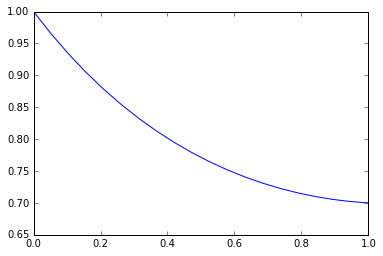

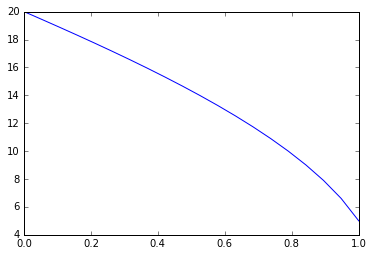

X = 0.3
P = 5.0
k = 0.694922181181
K = 10.4342547167


In [6]:
"""4"""
Wspan = linspace(0,1,20)
FAo = 1
Ftoto = 1
Qo = 1
Po = 20
def solver(x):
    k,K = x
    def PBR(F,W):
        FA, FB, P = F
        Ftot = (FA + FB)
        Q = Po*Qo*Ftot/(P*Ftoto)
        ra = -k*(FA/Q)**2
        rb = -ra/2
        dpdw = -K*(Po*Ftot)/(P*Ftoto)
        return (ra,rb,dpdw)

    ANS = odeint(PBR,[FAo, 0, Po],Wspan)
    FAi,Pi  = ANS[:,0], ANS[:,2]
    X = (FAo - FAi[-1])/FAo
    return (X - 0.3,
           Pi[-1] - 5)

k,K = fsolve(solver,[0.6,10]) #To obtain these intial guess two fsolves where used of the same function as above 
                                        #except for one variable at a time

def PBR(F,W):
    FA, FB, P = F
    Ftot = (FA + FB)
    Q = Po*Qo*Ftot/(P*Ftoto)
    ra = -k*(FA/Q)**2
    rb = -ra/2
    dpdw = -K*(Po*Ftot)/(P*Ftoto)
    return (ra,rb,dpdw)

ANS = odeint(PBR,[FAo, 0, Po],Wspan)
FAi,Pi  = ANS[:,0], ANS[:,2]
X = (FAo - FAi[-1])/FAo
plt.plot(Wspan,FAi)
plt.show()
plt.plot(Wspan,Pi)
plt.show()
print ('X = ' + str(X))
print ('P = ' + str(Pi[-1]))

print ('k = ' + str(k))
print ('K = ' + str(K))

In [7]:
FAo = 1
FBo = 0
W = 1
Ftoto = 1
Qo = 1
P = 20
k = 0.694922181181
K = 10.4342547167

def CSTR(X):
    FA,FB = X
    Ftot = (FA + FB)
    Q = Qo*Ftot/(Ftoto)
    ra = -k*(FA/Q)**2
    eqn0 = FAo - FA + ra*W
    eqn1 = FBo - FB - ra*W
    return eqn0,eqn1

FAi,FBi = fsolve(CSTR,[1,0])
X = (FAo - FAi)/FAo
print ('X = ' + str(X))

X = 0.320684975901


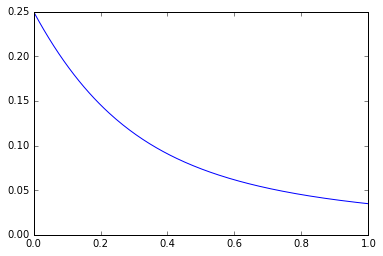

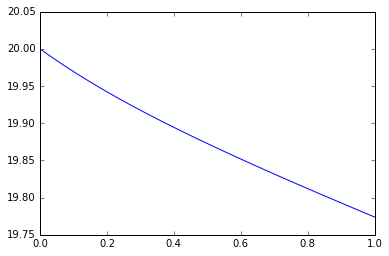

X = 0.860712282417
P = 19.7738196194


In [8]:
k = 0.694922181181
Kold = 10.4342547167
K = Kold*(0.25**2/2)
Qo = 1/4
FAo = 1/4
Ftoto = 1/4
def PBR(F,W):
    FA, FB, P = F
    Ftot = (FA + FB)
    Q = Po*Qo*Ftot/(P*Ftoto)
    ra = -k*(FA/Q)**2
    rb = -ra/2
    dpdw = -K*(Po*Ftot)/(P*Ftoto)
    return (ra,rb,dpdw)

Wspan = linspace(0,1,200)
ANS = odeint(PBR,[FAo, 0, Po],Wspan)
FAi,Pi  = ANS[:,0], ANS[:,2]
X = (FAo - FAi[-1])/FAo
plt.plot(Wspan,FAi)
plt.show()
plt.plot(Wspan,Pi)
plt.show()
print ('X = ' + str(X))
print ('P = ' + str(Pi[-1]))

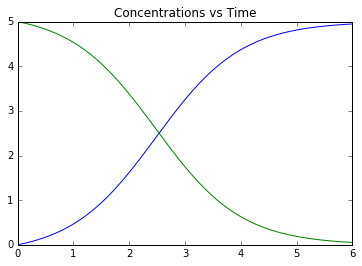

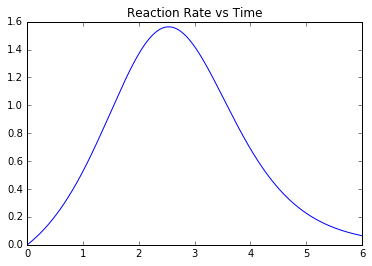

Max Rate = 1.56249962598 mol/l.min  @ 2.53453453453 min


In [9]:
"""5"""
V = 1 #L
Q = 50/1000 #ml/min
k = 0.25 #l/mol.min
CAo = 5 #mol/l
CBo = 5 #mol/l


def ra(Ca,Cb):
    return k*Ca*Cb*V


def semibatch(C,Time):
    Ca,Cb = C
    dCadt = (0 - ra(Ca,Cb) - Ca*Q)/V
    dCbdt = (CBo*Q + ra(Ca,Cb) - Cb*Q)/V
    return dCadt,dCbdt

tspan = linspace(0,6,1000)

ANS = odeint(semibatch,[CAo,0],tspan)
CA = ANS[:,0]
CB = ANS[:,1]

rate = k*CA*CB*V
plt.title("Concentrations vs Time")
plt.plot(tspan,CB)
plt.plot(tspan,CA)
plt.show()

plt.title("Reaction Rate vs Time")
plt.plot(tspan,rate)
plt.show()

maxra = max(rate)
time = tspan[argmax(rate)]

print ('Max Rate = ' + str(maxra) +  ' mol/l.min  @ ' + str(time) + ' min' )
